In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

In [11]:
data=pd.read_csv('data.csv')

In [12]:
data

,File No,Player Name,Innings,Batting Position,Runs,Dots,1s,2s,3s,4s,6s,Balls Played,Wicket Method,Balls Bowled,Runs Given,Extras Given,Wickets Taken
0,710305.csv,Anamul Haque,1,1.0,100,74,46,3,0,6,4,133,caught,0,0,0,0
1,710305.csv,Imrul Kayes,1,2.0,59,44,27,0,0,5,2,78,caught,0,0,0,0
2,710305.csv,Mominul Haque,1,3.0,51,17,21,3,0,6,0,47,caught,54,37,0,2
3,710305.csv,Mushfiqur Rahim,1,4.0,51,9,17,1,0,8,0,35,NaN,0,0,0,0
4,710305.csv,Shakib Al Hasan,1,5.0,44,2,6,1,0,6,2,17,NaN,62,51,3,1
5,710305.csv,Abdur Razzak,1,NaN,0,0,0,0,0,0,0,0,NaN,55,70,2,1
6,710305.csv,Al-Amin Hossain,1,NaN,0,0,0,0,0,0,0,0,NaN,43,48,4,2
7,710305.csv,Mahmudullah,1,NaN,0,0,0,0,0,0,0,0,NaN,42,47,1,1
8,710305.csv,Nasir Hossain,1,NaN,0,0,0,0,0,0,0,0,NaN,18,17,0,0
9,710305.csv,Shafiul Islam,1,NaN,0,0,0,0,0,0,0,0,NaN,33,46,3,0


In [13]:
data.corr()

,Innings,Batting Position,Runs,Dots,1s,2s,3s,4s,6s,Balls Played,Balls Bowled,Runs Given,Extras Given,Wickets Taken
Innings,1.000000,-0.043242,-0.057557,-0.040546,-0.072938,-0.057431,-0.018248,-0.021794,-0.049305,-0.055698,0.099605,0.104593,0.050522,0.064616
Batting Position,-0.043242,1.000000,-0.344088,-0.426241,-0.285461,-0.251580,-0.188473,-0.378723,-0.094351,-0.397623,0.611796,0.590337,0.423757,0.400389
Runs,-0.057557,-0.344088,1.000000,0.799704,0.917083,0.801013,0.393859,0.900744,0.585267,0.925273,-0.338926,-0.304890,-0.223510,-0.232305
Dots,-0.040546,-0.426241,0.799704,1.000000,0.792316,0.662952,0.361183,0.720114,0.316642,0.957810,-0.407845,-0.380495,-0.261661,-0.286428
1s,-0.072938,-0.285461,0.917083,0.792316,1.000000,0.755526,0.346233,0.730424,0.403630,0.925705,-0.327756,-0.298056,-0.218964,-0.227122
2s,-0.057431,-0.251580,0.801013,0.662952,0.755526,1.000000,0.356108,0.621733,0.348892,0.772978,-0.273988,-0.248583,-0.183089,-0.190018
3s,-0.018248,-0.188473,0.393859,0.361183,0.346233,0.356108,1.000000,0.307709,0.099164,0.392537,-0.180850,-0.169843,-0.115589,-0.119676
4s,-0.021794,-0.378723,0.900744,0.720114,0.730424,0.621733,0.307709,1.000000,0.409828,0.806168,-0.320547,-0.289313,-0.208762,-0.217117
6s,-0.049305,-0.094351,0.585267,0.316642,0.403630,0.348892,0.099164,0.409828,1.000000,0.408741,-0.115534,-0.091605,-0.075518,-0.079105
Balls Played,-0.055698,-0.397623,0.925273,0.957810,0.925705,0.772978,0.392537,0.806168,0.408741,1.000000,-0.395123,-0.364088,-0.257362,-0.275341


In [14]:
data=data[['File No','Runs','4s','6s','Balls Played','Dots']]

In [16]:
data.corr()

,Runs,4s,6s,Balls Played,Dots
Runs,1.000000,0.900744,0.585267,0.925273,0.799704
4s,0.900744,1.000000,0.409828,0.806168,0.720114
6s,0.585267,0.409828,1.000000,0.408741,0.316642
Balls Played,0.925273,0.806168,0.408741,1.000000,0.957810
Dots,0.799704,0.720114,0.316642,0.957810,1.000000


/home/tprolifer/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


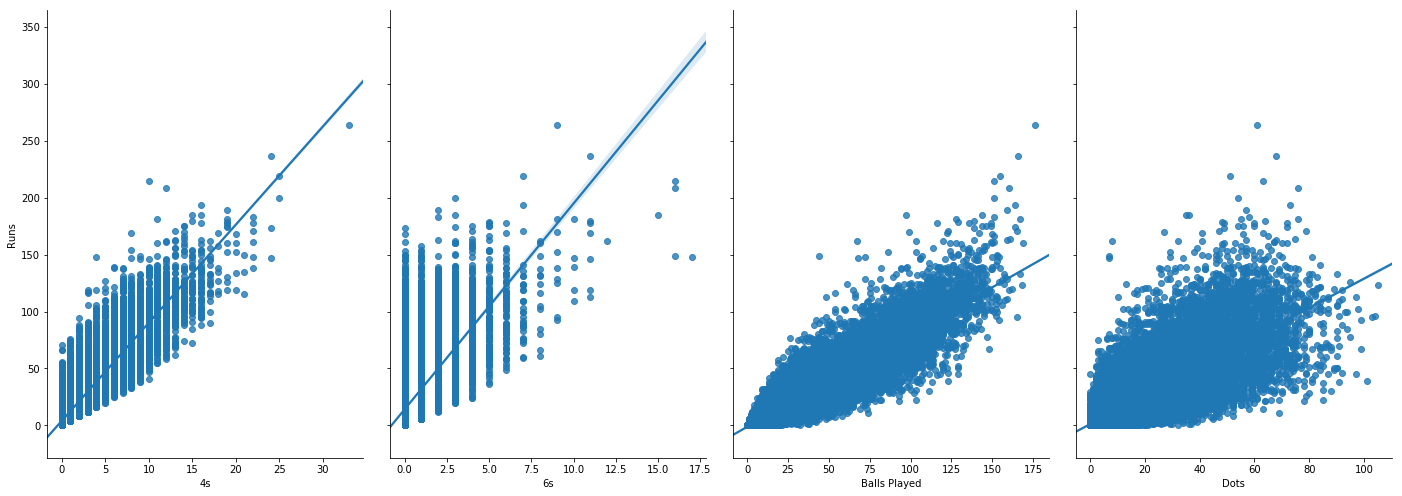

In [18]:
sns.pairplot(data,x_vars=['4s','6s','Balls Played','Dots'],y_vars='Runs',size=7,aspect=0.7,kind='reg')

In [24]:
feature_cols=['4s','6s','Balls Played','Dots']
x=data[feature_cols]
y=data['Runs']
x

,4s,6s,Balls Played,Dots
0,6,4,133,74
1,5,2,78,44
2,6,0,47,17
3,8,0,35,9
4,6,2,17,2
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [26]:
print(x_train.shape)

(26871, 4)


In [27]:
print(y_train.shape)

(26871,)


In [28]:
print(x_test.shape)

(8957, 4)


In [29]:
print(y_test.shape)

(8957,)


In [31]:
x_train=x_train.fillna(0)
y_train=y_train.fillna(0)

In [32]:
linreg=LinearRegression()
linreg.fit(x_train,y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
 print(linreg.intercept_)

0.06916176632337567


In [34]:
print(linreg.coef_)

[ 2.86430575  4.78548451  1.15535875 -1.14760184]


In [36]:
x=sm.add_constant(x)

/home/tprolifer/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:
model=sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Runs   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.240e+06
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:47:44   Log-Likelihood:                -48887.
No. Observations:               26871   AIC:                         9.778e+04
Df Residuals:                   26867   BIC:                         9.781e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
4s               2.8648      0.006    487.912      0.000       2.853       2.876
6s               4.7890      0.012    391.393      0.000       4.765       4.813
Balls Played     1.1554      0.001    846.869      0.000       1.153       1.158
Dots            -1.1457      0.002   -557.026      0.000      -1.150      -1.142
==============================================================================
Omnibus:                     8426.924   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84576.965
Skew:                           1.217   Prob(JB):                         0.00
Kurtosis:                      11.344   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""